# [ML Mid Assignment] Clustering 
2018204094 박형빈

군집화 분석 수행

# 1. Data Load


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import collections
import mglearn
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings(action='ignore') 

random.seed(2020)

In [2]:
path = "./Dataset/"

obesity = pd.read_csv(path+"ObesityDataSet.csv")

# original data -> obesity
obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# 2. EDA 

**2,111 rows X 17 columns**

- **범주형 변수** 
    - **명목형 변수 Nominal Variable** 
    - Gender (2)
    - MTRANS (5)
    - **순서형 변수 Ordinary Variable** 
    - SMOKE (2)
    - family_history_with_overweight (2)
    - FAVC, Frequent consumption of high caloric food (2) 
    - SCC, Calories consumption monitoring (2)
    - CAEC, Consumption of food between meals (4)
    - CALC, Consumption of alcohol (4)
    
- **연속형 변수** 
    - Age 
    - Height
    - Weight
    - FCVC, Frequency of consumption of vegetables
    - NCP, Number of main meals
    - CH2O, Consumption of water daily
    - FAF, Physical activity frequency 
    - TUE, Time using technology devices
    
- **y 변수** 
    - NObeyesdad (7)
    - 'Insufficient_Weight' 저체중
    - 'Normal_Weight' 정상
    - 'Overweight_Level_I', 'Overweight_Level_II' 과체중 
    - 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III' 비만

<AxesSubplot:>

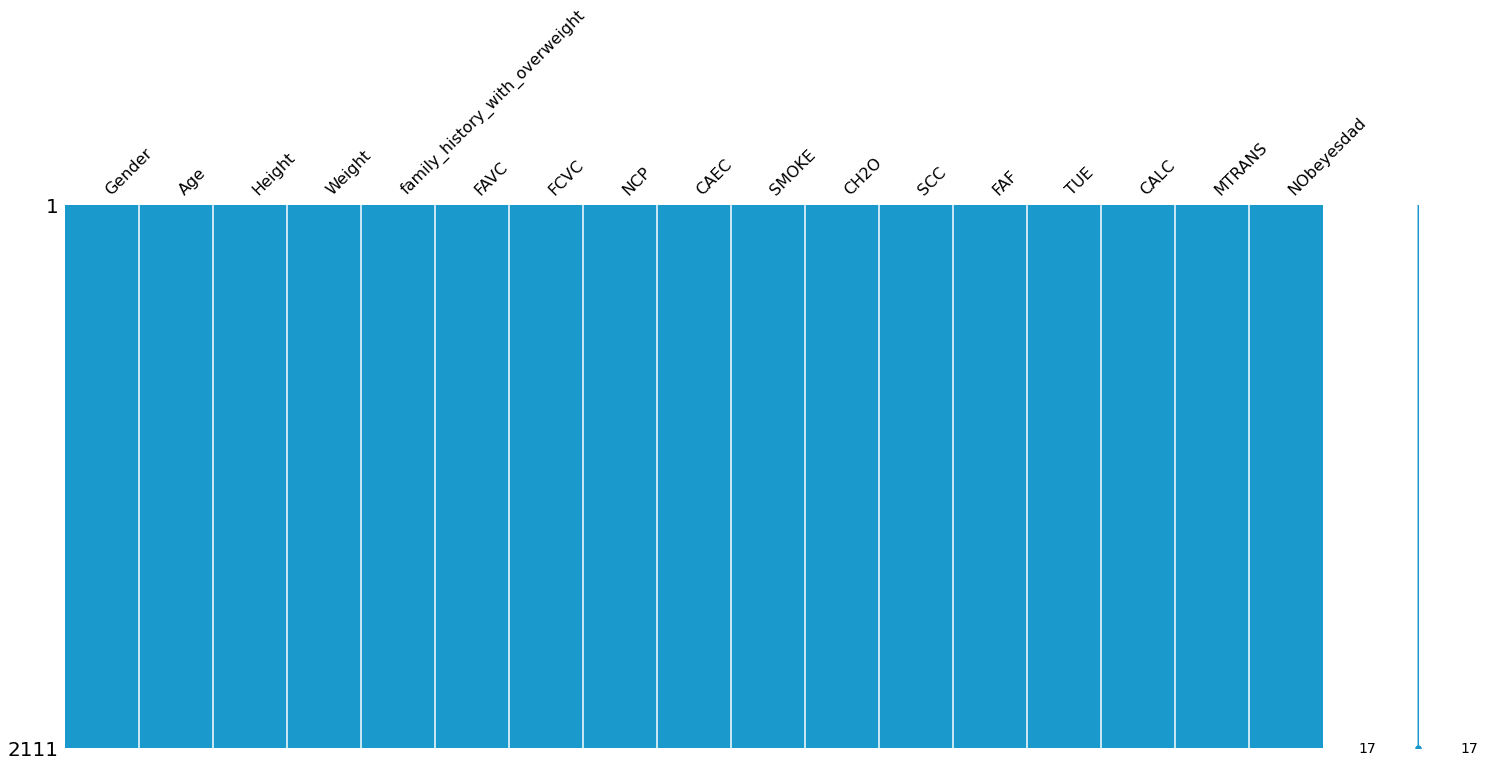

In [4]:
# check missing value -> 결측치 없음 
msno.matrix(obesity.iloc[:, :], color=(0.1, 0.6, 0.8))

In [5]:
# 각 column의 unique value, value 개수를 확인합니다 
for c in obesity.columns : 
    print(c,"(", obesity[c].nunique(), "): ", obesity[c].unique())
    print()

Gender ( 2 ):  ['Female' 'Male']

Age ( 1402 ):  [21.       23.       27.       ... 22.524036 24.361936 23.664709]

Height ( 1574 ):  [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

Weight ( 1525 ):  [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

family_history_with_overweight ( 2 ):  ['yes' 'no']

FAVC ( 2 ):  ['no' 'yes']

FCVC ( 810 ):  [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.

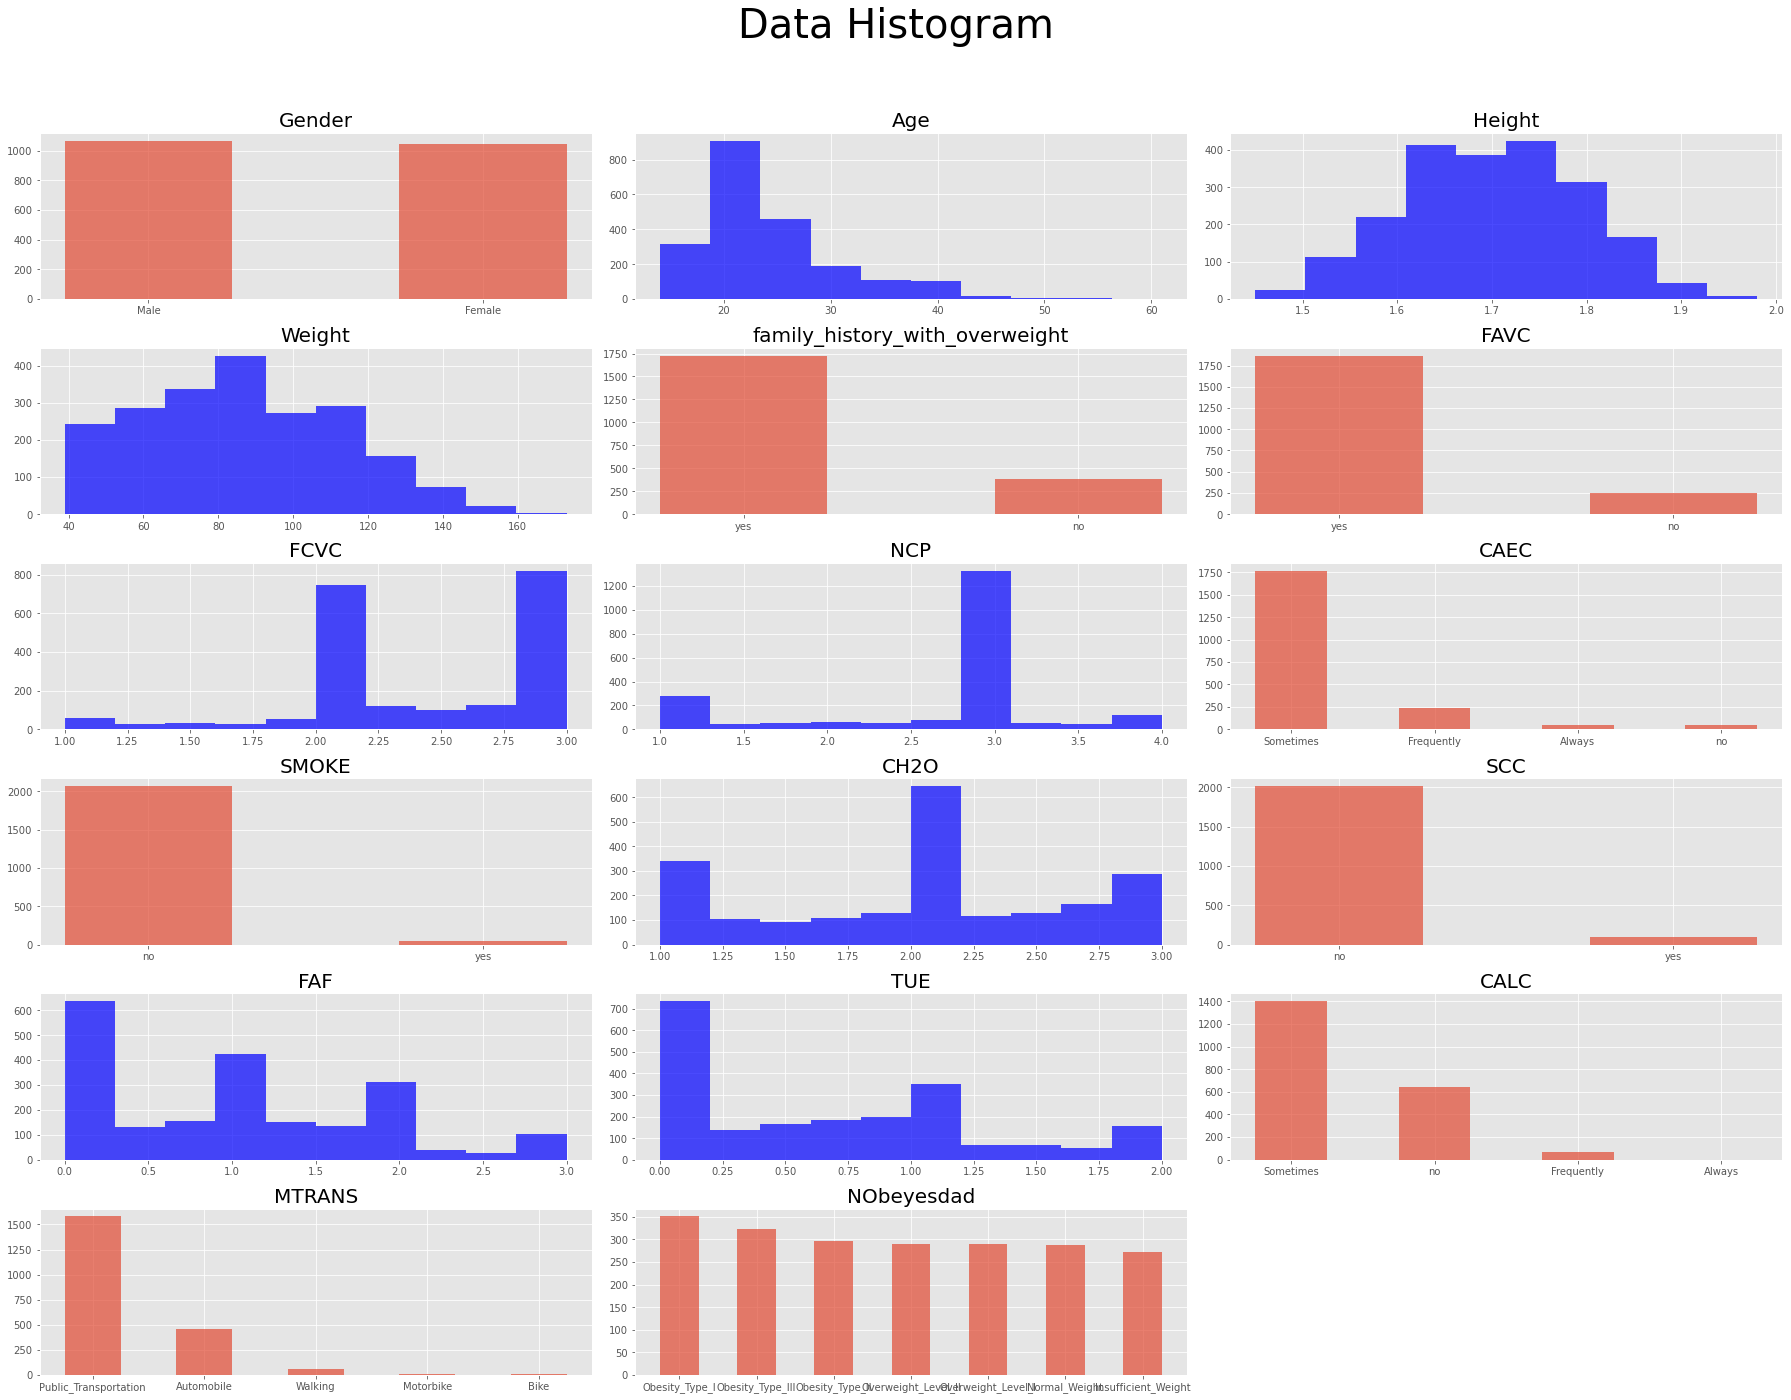

In [6]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

cols = obesity.columns
for i in range(len(cols)):
    plt.subplot(6,3,i+1)
    plt.title(cols[i], fontsize=20)
    if len(obesity[cols[i]].unique()) > 20:
        plt.hist(obesity[cols[i]], color='b', alpha=0.7)
    else:
        temp = obesity[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.show()

# 3. Preprocessing

data -> processed_data

- 결측치 제거 -> 필요 없음 
- 범주형 변수, 순서형 변수 
    - FAVC, SCC, family_history_with_overweight, SMOKE 
        - yes 1 
        - no 0 
    - CAEC, CALC
        - 'no', 'Sometimes', 'Frequently', 'Always'
        - 0, 1, 2, 3 
- 범주형 변수, 명목형 변수 
    - Gender, MTRANS
    - One-hot Encoding 
- 정규화
    - Standard Scaler 
    - Clustering은 거리기반 알고리즘이기 때문에 단위의 영향력을 제거하기 위해 표준화 진행해야 한다.
    - 평균0, 표준편차1로 scaling을 맞춰주는 standardScaler를 사용하였다.

In [7]:
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
# 전처리를 위해 원본 데이터를 따로 저장합니다 
# 원본 데이터 : data
# 전처리된 데이터 : processed_data
processed_data = obesity.drop(['Gender'], axis=1).copy()
#processed_data = obesity.copy()

In [9]:
# Encoding 
# Ordinary Encoding 
two_cols = []
four_cols = []
four_dict = {'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}

cols = processed_data.columns
for c in cols :
    if processed_data[c].nunique() == 2 and c != 'Gender':
        two_cols.append(c)
    if processed_data[c].nunique() == 4 : 
        four_cols.append(c)

for c in two_cols : 
    processed_data[c] = processed_data[c].apply(lambda x : 1 if x == 'yes' else 0 )
for c in four_cols : 
    processed_data[c] = processed_data[c].map(four_dict)
    
# One-hot Encdoing : gender 
#df_gender = pd.get_dummies(processed_data['Gender'])
#processed_data = processed_data.drop(['Gender'], axis=1)
#processed_data = pd.concat([processed_data, df_gender], axis=1)

# One-hot Encdoing : MTRANS 
df_trans = pd.get_dummies(processed_data['MTRANS'])
processed_data = processed_data.drop(['MTRANS'], axis=1)
processed_data = pd.concat([processed_data, df_trans], axis=1)

In [10]:
# Standard Scaling 
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_scaler = processed_data[processed_data.columns.difference(['NObeyesdad'])]
df_scaler = scaler.fit_transform(df_scaler)
df_scaler = pd.DataFrame(df_scaler)
processed_data[processed_data.columns.difference(['NObeyesdad'])] = df_scaler

In [11]:
processed_data.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.333333,0.0,0.5,0.0,0.000000,0.5,0.000000,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,0.333333,1.0,1.0,1.0,1.000000,0.0,0.333333,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.333333,0.0,0.5,0.0,0.666667,0.5,0.666667,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.333333,0.0,0.5,0.0,0.666667,0.0,0.666667,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.333333,0.0,0.5,0.0,0.000000,0.0,0.333333,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0


# 4. PCA (Principal Component Analysis)
Clustering을 위한 전처리 과정을 마쳤습니다.  
PCA 차원축소는 기존의 데이터셋에 공분산 행렬을 생성하고 고유의 Vector와 값을 계산합니다.  
그런 다음 고유 값이 큰 순서대로 정렬 후 변환해야할 차원의 수 만큼 고유 값을 정한 뒤, 고유 Vector에 투영하여 차원을 축소합니다.  

기본적인 전처리와 정규화를 마무리해주었다면, PCA를 위한 준비가 끝난 것입니다. 

processed_data -> input_data 

In [12]:
# PCA를 위해 전처리된 데이터를 따로 저장합니다 
# 전처리된 데이터 : processed_data
# PCA 데이터 : input_data 
input_data = processed_data.copy()

# X 변수들과 y 변수를 분리하여 관리하면 용이합니다 
# 특히, y 변수의 class를 임의로 labeling 하여 7개의 class를 4개로 바꾼 형태에 대해서도 실험해볼 예정이기에 이 점에 유의해야 합니다 
input_data_X = input_data[input_data.columns.difference(['NObeyesdad'])]
input_data_y = input_data['NObeyesdad']

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
input_data_X = pca.fit_transform(input_data_X)
input_data_X = pd.DataFrame(input_data_X, columns=["X1", "X2"]) # rename

input_data = pd.concat([input_data_X, input_data_y], axis=1)
input_data = input_data.rename(columns={'NObeyesdad':'Class'}) # rename 

# Class : class 모두 존재
# Class4 : class 4개로 축소
y_dict = {'Obesity_Type_I' : 'Obesity', 'Obesity_Type_II' : 'Obesity', 'Obesity_Type_III' : 'Obesity', 
          'Overweight_Level_I' : 'Overweight', 'Overweight_Level_II' : 'Overweight',
          'Normal_Weight' : 'Normal_Weight', 'Insufficient_Weight' : 'Insufficient_Weight'}
input_data['Class4'] = input_data['Class'].map(y_dict)

input_data.head()

,X1,X2,Class,Class4
0,-0.349479,0.205633,Normal_Weight,Normal_Weight
1,-0.331007,0.316588,Normal_Weight,Normal_Weight
2,-0.328367,0.131872,Normal_Weight,Normal_Weight
3,0.362842,1.063490,Overweight_Level_I,Overweight
4,-0.401218,0.961509,Overweight_Level_II,Overweight


Text(0.5, 1.0, "Data:['X1', 'X2', 'Class', 'Class4']")

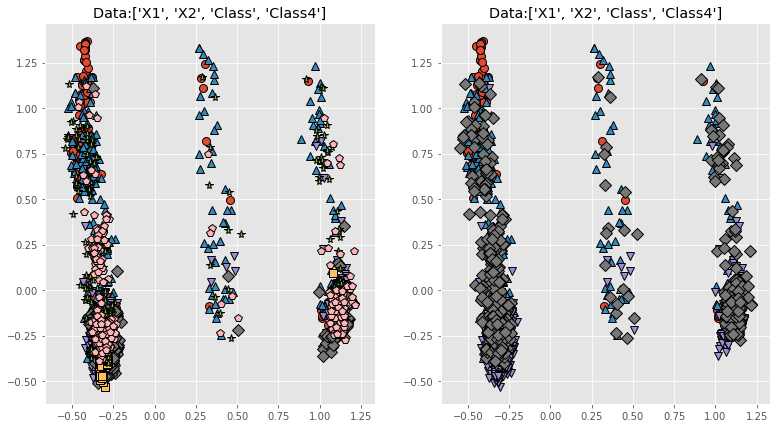

In [14]:
# 원본 데이터에 대한 시각화를 진행합니다 
fig, axes = plt.subplots(1,2,figsize=(13,7))

# 원본 데이터 class 7개의 경우 
Data = input_data[list(input_data.keys())]
mglearn.discrete_scatter(input_data['X1'], input_data['X2'], input_data['Class'], ax=axes[0], s=8)
axes[0].set_title("Data:" + str(list(input_data.keys())))

# 원본 데이터 class 4개의 경우 
Data = input_data[list(input_data.keys())]
mglearn.discrete_scatter(input_data['X1'], input_data['X2'], input_data['Class4'], ax=axes[1],s=8)
axes[1].set_title("Data:" + str(list(input_data.keys())))

# 4. K-means Clsutering 

In [ ]:
mglearn.plots.plot_kmeans_algorithm()

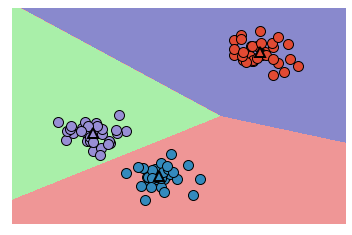

In [16]:
# K-Means 에 따라 학습된 decision boundary 가시화
mglearn.plots.plot_kmeans_boundaries()

In [43]:
# 산점도 가시화
def Simple_Scatter(data, Name):
    G = sns.jointplot(x = data.columns[0], y = data.columns[1], data = data, kind='scatter', hue = data.columns[2])
    G.fig.suptitle("Data : " + str(Name), fontsize = 10, color = 'black', alpha = 0.9)

# K-Means 클러스터링 함수 실행 후 차트 가시화
def k_Means_Plot(Data, Select_k, Init_Method = 'k-means++', Num_Init=10):
    fig, axes = plt.subplots((np.max(list(Select_k)))//6 + 1, 4, figsize=(20, 10)) 
    for i in Select_k:  
        row = ((i-2) //4)
        col = ((i-2) % 4)
        Kmeans_Clustering = KMeans(n_clusters=i, init=Init_Method, random_state=2020, n_init=Num_Init)
        Kmeans_Clustering.fit(Data) 
        mglearn.discrete_scatter(Data[Data.columns[0]], Data[Data.columns[1]], Kmeans_Clustering.labels_, ax=axes[row, col], s=7) 
        mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0], 
                                 Kmeans_Clustering.cluster_centers_[:, 1],
                                 list(range(i)), 
                                 markeredgewidth=3, 
                                 ax=axes[row, col], s=10)
        Score = np.round(silhouette_score(Data, Kmeans_Clustering.labels_),3)
        axes[row, col].set_title( 'k = ' + str(i)+' / S_Score:'+str(Score))

## 4.2. K-Means 알고리즘, 초기 값 설정의 중요성 실험

초기 값을 잡는 임의의 횟수 -> 'Num_init' = 1  
Number of time the k-means algorithm will be run with different centroid seeds.

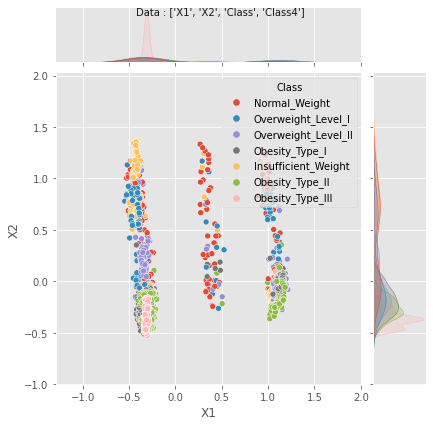

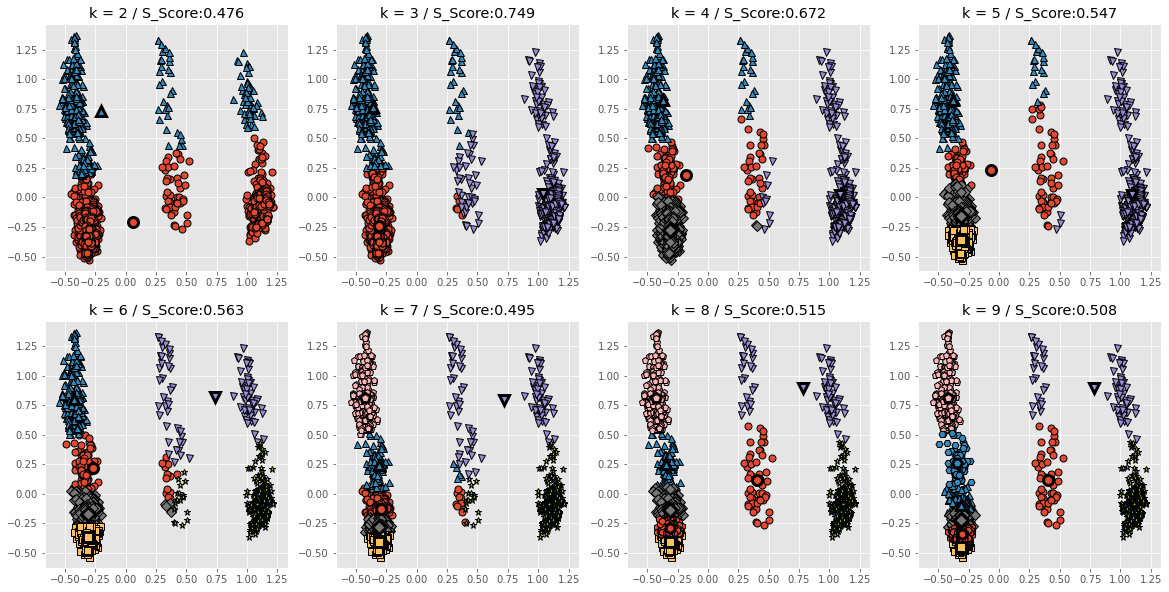

In [59]:
Simple_Scatter(input_data.iloc[:, :3], list(input_data.keys()))
    
k_Means_Plot(Data = input_data.iloc[:, :2],
                 Select_k = range(2, 10),
                 Init_Method='random',Num_Init=1)

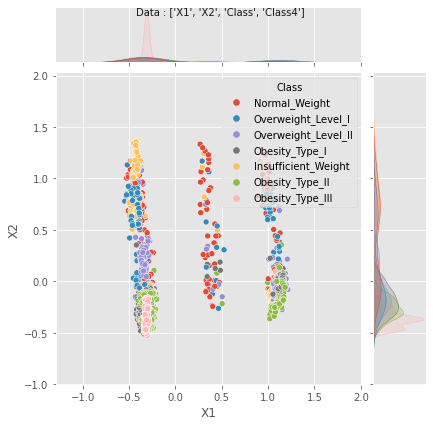

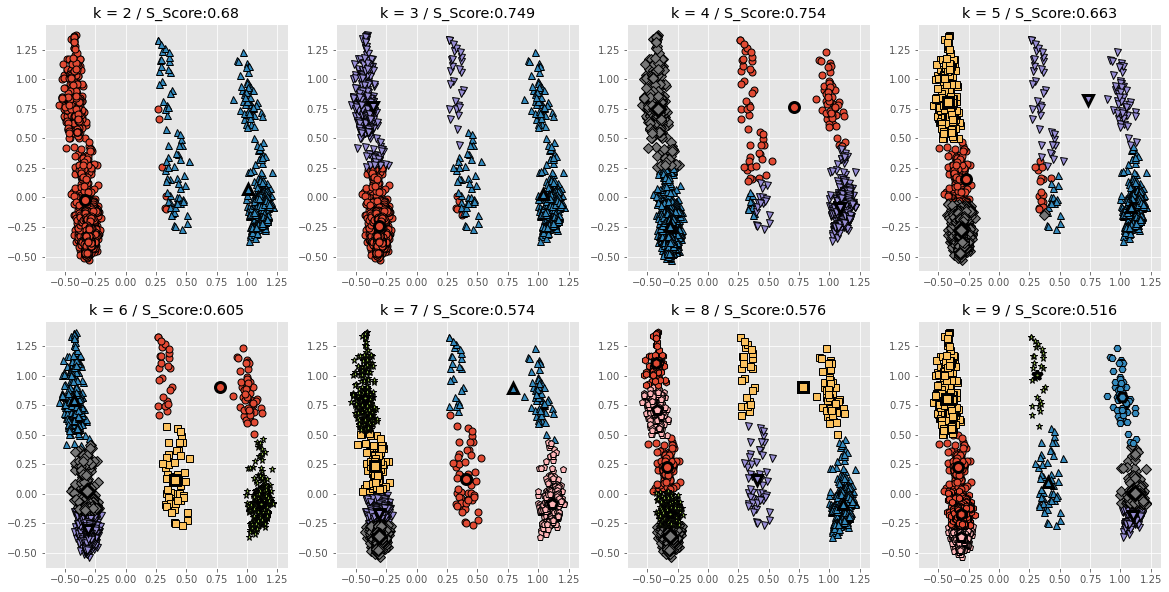

In [44]:
Simple_Scatter(input_data.iloc[:, :3], list(input_data.keys()))
    
k_Means_Plot(Data = input_data.iloc[:, :2],
                 Select_k = range(2, 10),
                 Init_Method='random',Num_Init=30)

## 4.3. K-Means++ 사용하기 

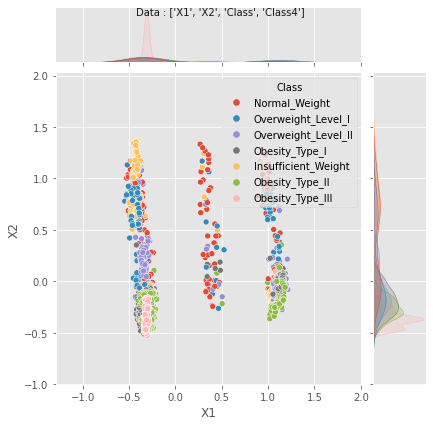

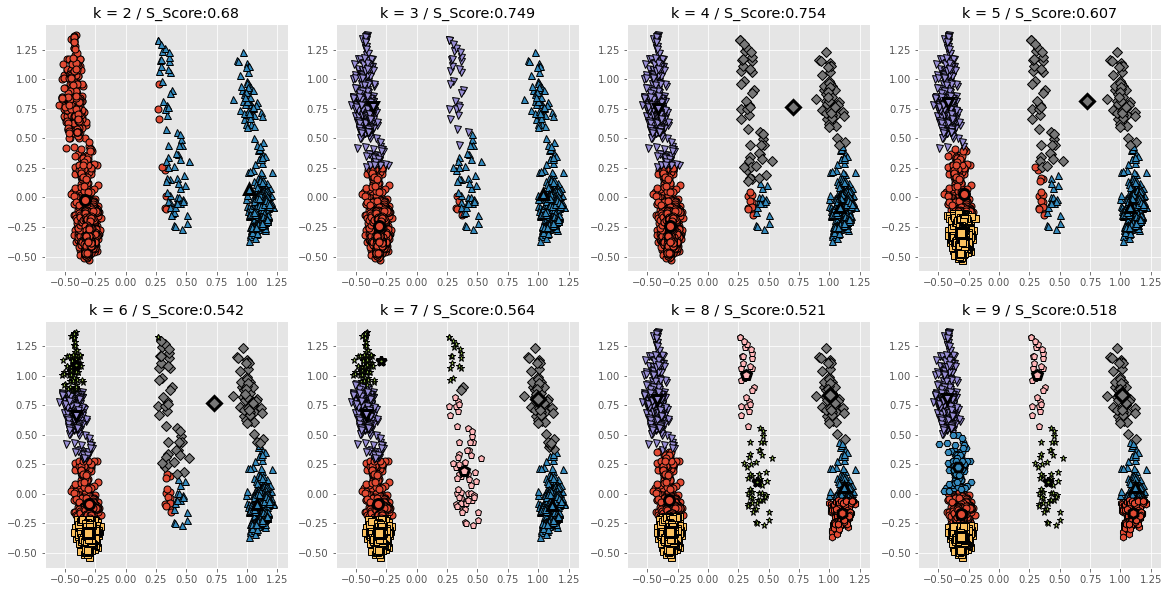

In [46]:
Simple_Scatter(input_data.iloc[:, :3], list(input_data.keys()))
    
k_Means_Plot(Data = input_data.iloc[:, :2],
                 Select_k = range(2, 10),
                 Init_Method='k-means++',Num_Init=1)

# 5. Hierarchical Clsutering 

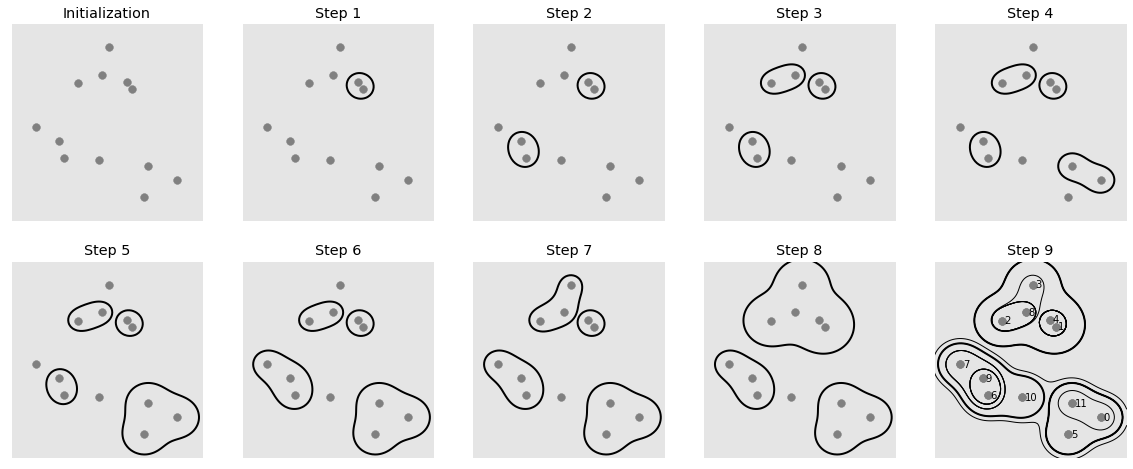

In [401]:
mglearn.plots.plot_agglomerative_algorithm()
mglearn.plots.plot_agglomerative()

In [42]:
def Fixed_Dendrogram(Data, Num_of_p, Full_Use):
    Linkage_Matrix = linkage(Data,'complete')
    if(Full_Use == True):
        Num_of_p = np.shape(Data)[0]
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
    else:
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Linkage_Matrix,
        truncate_mode = 'lastp',  
        p = Num_of_p, 
        leaf_rotation = 90.,
        leaf_font_size = 12.,
        color_threshold = 'default'
    )
    plt.show()

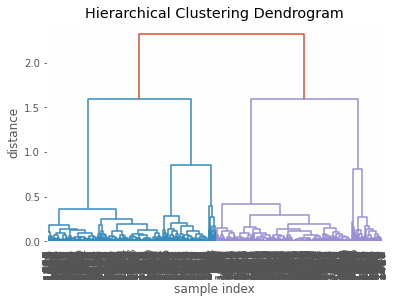

In [403]:
Fixed_Dendrogram(input_data[['X1','X2']], -1, True) # -1: nomeaningful value

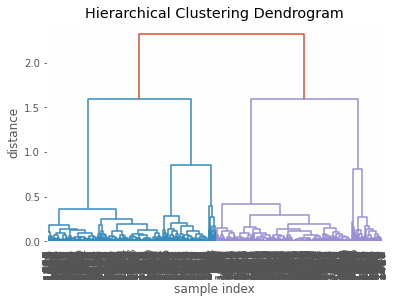

In [404]:
Fixed_Dendrogram(input_data[['X1','X2']], 10, True)

In [49]:
def Hclust_Plot(Data,Select_k,NAME):   
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters=i,linkage="complete")
        P_Labels = H_Clustering.fit_predict(Data)
        mglearn.discrete_scatter(Data['X1'], Data['X2'], P_Labels, ax=axes[i - 2], s=5)        
        axes[i - 2].set_title("Data:" +  str(NAME) + 'k = ' + str(i))
        Score=np.round(silhouette_score(Data,P_Labels),3)
        axes[i - 2].set_title('k = ' + str(i)+' / S_Score:'+str(Score))

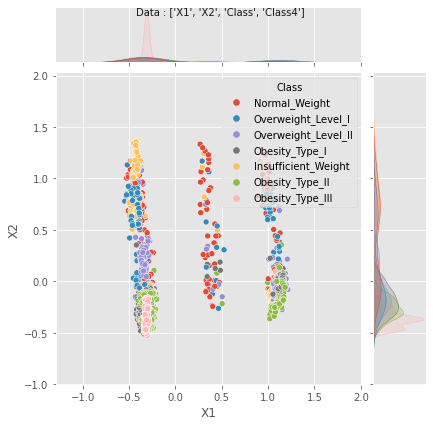

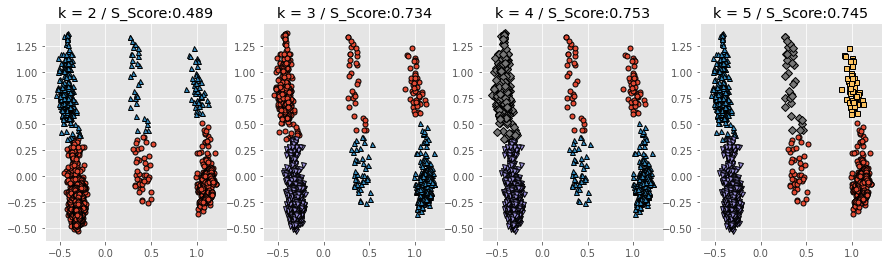

In [50]:
Simple_Scatter(input_data.iloc[:, :3], list(input_data.keys()))
Hclust_Plot(input_data.iloc[:, :2],
                range(2, 6), list(input_data.keys()))

# 6. DBSCAN Clsutering 

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


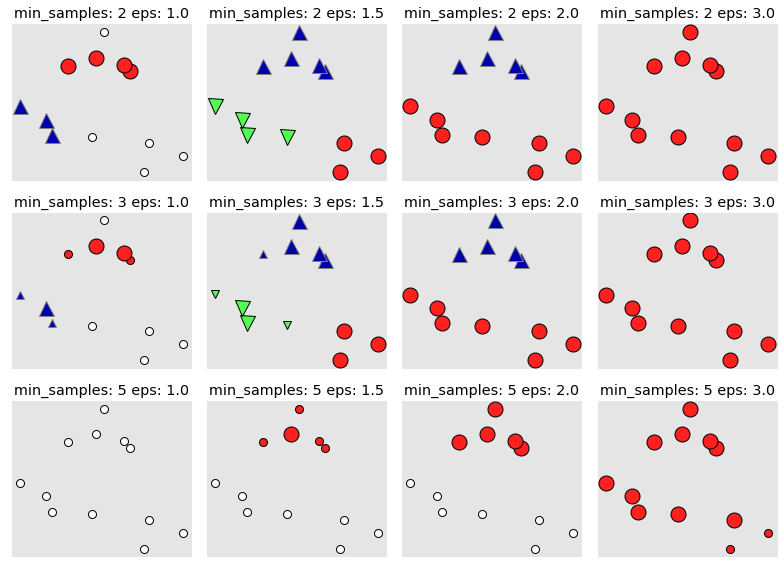

In [51]:
mglearn.plots.plot_dbscan()

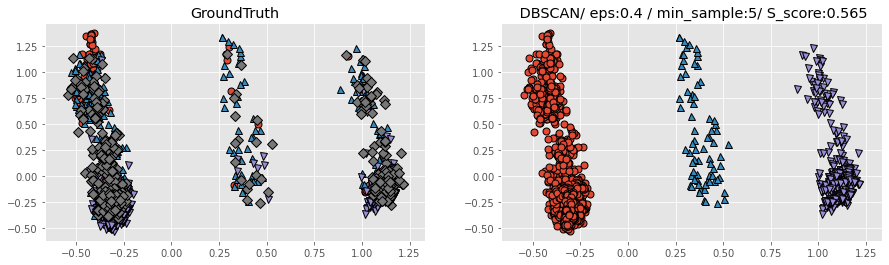

In [56]:
def DBSCAN_Plot(Data, NAME, min_samples=5, eps=0.4):
    Append_k_Means_Results = list()
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    Set_DBSCAN_Hyperparameter=DBSCAN(min_samples=min_samples,eps=eps)
    Results = Set_DBSCAN_Hyperparameter.fit_predict(Data[['X1', 'X2']])
    Score=np.round(silhouette_score(Data[['X1', 'X2']],Results),3)
    mglearn.discrete_scatter(Data['X1'], Data['X2'], Data['Class4'], ax=axes[0], s=7)
    axes[0].set_title('GroundTruth')    
    mglearn.discrete_scatter(Data['X1'], Data['X2'], Results, ax=axes[1], s=7)
    axes[1].set_title(' DBSCAN/ eps:'+str(eps)+' / min_sample:'+str(min_samples)+'/ S_score:'+str(Score))


DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']], NAME="Obesity")

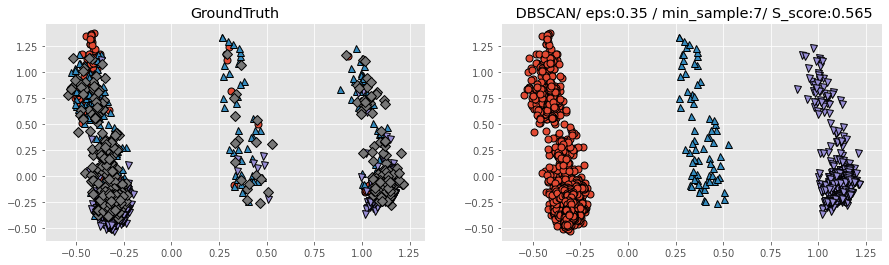

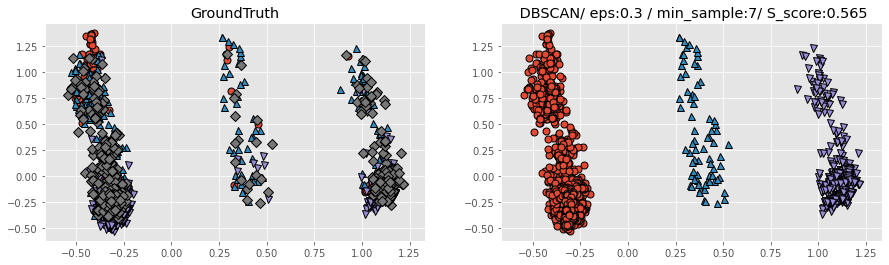

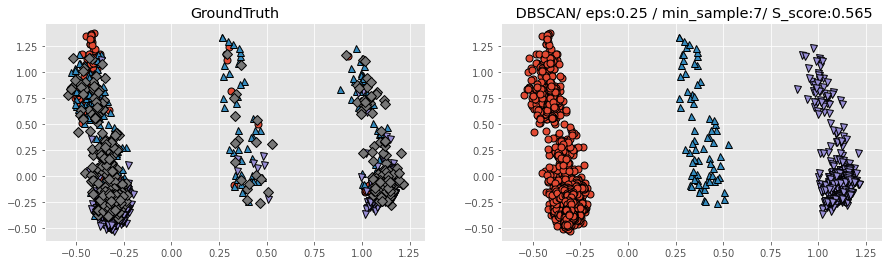

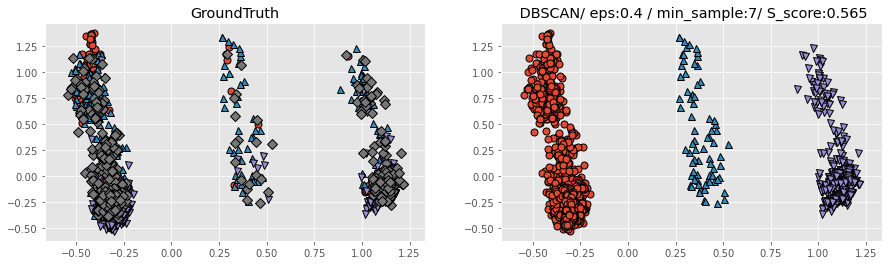

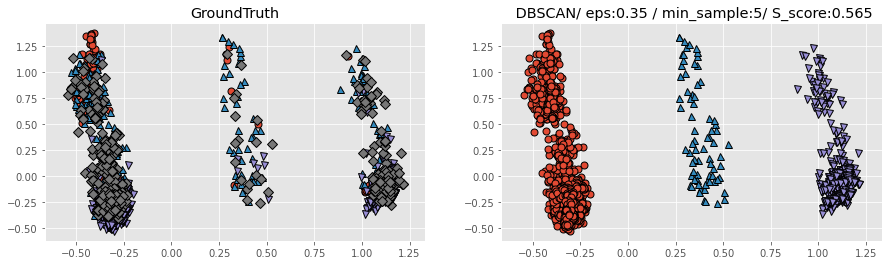

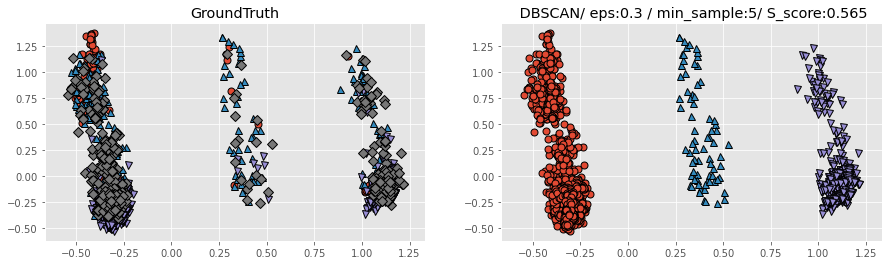

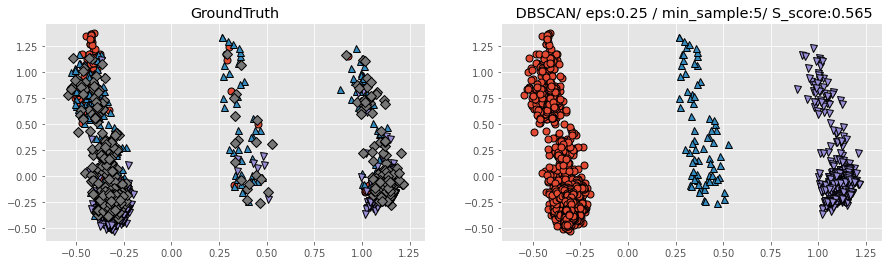

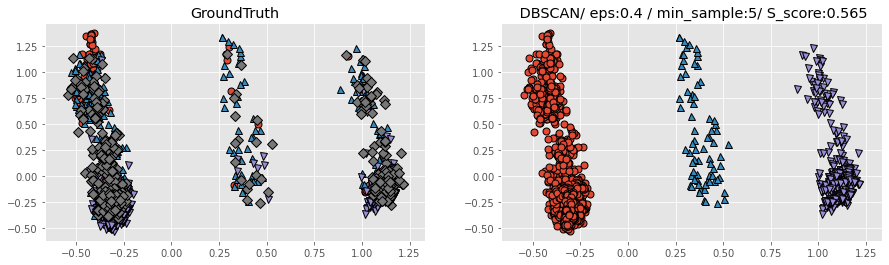

In [57]:
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=7,eps=0.35)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=7,eps=0.30)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=7,eps=0.25)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=7,eps=0.40)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=5,eps=0.35)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=5,eps=0.30)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=5,eps=0.25)
DBSCAN_Plot(Data=input_data[['X1', 'X2', 'Class4']],NAME="Obesity",min_samples=5,eps=0.40)